# TEA Student Enrollment Data (Austin ISD)

## Enrollment Data

Pull data and place into a dataframe. Clean and reformat for ease of use.

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from functools import reduce

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')


In [2]:
# load in csv files
travis_12_load = os.path.join("Travis_Raw_Data", "Enrollment Report_County_TRAVIS COUNTY_Campuses_Grade_2011-2012.csv")
travis_13_load = os.path.join("Travis_Raw_Data", "Enrollment Report_County_TRAVIS COUNTY_Campuses_Grade_2012-2013.csv")
travis_14_load = os.path.join("Travis_Raw_Data", "Enrollment Report_County_TRAVIS COUNTY_Campuses_Grade_2013-2014.csv")
travis_15_load = os.path.join("Travis_Raw_Data", "Enrollment Report_County_TRAVIS COUNTY_Campuses_Grade_2014-2015.csv")
travis_16_load = os.path.join("Travis_Raw_Data", "Enrollment Report_County_TRAVIS COUNTY_Campuses_Grade_2015-2016.csv")
travis_17_load = os.path.join("Travis_Raw_Data", "Enrollment Report_County_TRAVIS COUNTY_Campuses_Grade_2016-2017.csv")
travis_18_load = os.path.join("Travis_Raw_Data", "Enrollment Report_County_TRAVIS COUNTY_Campuses_Grade_2017-2018.csv")


In [3]:
# put all the data into dataframes
travis_12 = pd.read_csv(travis_12_load, skiprows=2)
travis_13 = pd.read_csv(travis_13_load, skiprows=2)
travis_14 = pd.read_csv(travis_14_load, skiprows=2)
travis_15 = pd.read_csv(travis_15_load, skiprows=2)
travis_16 = pd.read_csv(travis_16_load, skiprows=2)
travis_17 = pd.read_csv(travis_17_load, skiprows=2)
travis_18 = pd.read_csv(travis_18_load, skiprows=2)


In [4]:
# put all dataframes into a list
data_frames_x = [travis_12, travis_13, travis_14, travis_15, travis_16, travis_17, travis_18]

# create a function to clean all dataframes
def func(df):
    df2 = df[df['District Name']=='AUSTIN ISD']
    df3 = df2.replace(-9999999, 2)
    df4 = df3.groupby('Campus Name').sum().reset_index()
    df5 = df4[['Campus Name', 'Enrollment by Grade Level']]
    return df5
    new_df.append(df5)
    

In [5]:
# call function
for i in range(0,len(data_frames_x)):
    data_frames_x[i] = func(data_frames_x[i])


In [6]:
# rename columns for enrollment
enr_12 = data_frames_x[0].rename(columns={'Enrollment by Grade Level':'2011-2012 Enrollment'})
enr_13 = data_frames_x[1].rename(columns={'Enrollment by Grade Level':'2012-2013 Enrollment'})
enr_14 = data_frames_x[2].rename(columns={'Enrollment by Grade Level':'2013-2014 Enrollment'})
enr_15 = data_frames_x[3].rename(columns={'Enrollment by Grade Level':'2014-2015 Enrollment'})
enr_16 = data_frames_x[4].rename(columns={'Enrollment by Grade Level':'2015-2016 Enrollment'})
enr_17 = data_frames_x[5].rename(columns={'Enrollment by Grade Level':'2016-2017 Enrollment'})
enr_18 = data_frames_x[6].rename(columns={'Enrollment by Grade Level':'2017-2018 Enrollment'})


In [7]:
# create variable to hold all dataframes
data_frames = [enr_12, enr_13, enr_14, enr_15, enr_16, enr_17, enr_18]

# merge all the dataframes
df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['Campus Name'],how='outer'), data_frames)

# replace 'NaN' with '0'
df_merged.fillna(0, inplace=True)

# display data
df_merged.head()

,Campus Name,2011-2012 Enrollment,2012-2013 Enrollment,2013-2014 Enrollment,2014-2015 Enrollment,2015-2016 Enrollment,2016-2017 Enrollment,2017-2018 Enrollment
0,ACES- ALTERNATIVE CENTER FOR ELEME,16.0,0.0,0.0,0.0,0.0,0.0,0.0
1,AKINS H S,2668.0,2583.0,2565.0,2667.0,2713.0,2680.0,2765.0
2,ALLAN EL,367.0,44.0,0.0,0.0,0.0,0.0,0.0
3,ALLISON EL,522.0,501.0,497.0,487.0,543.0,461.0,479.0
4,ALTERNATIVE LEARNING CENTER,179.0,149.0,137.0,166.0,116.0,107.0,98.0


In [8]:
# export data into a csv
path = 'Austin_ISD_Clean/Data'
export_df_merged = df_merged.to_csv(os.path.join(path,'TEA_enrollment_cleaned.csv'))

## Enrollment Changes from Year to Year

Calculate the changes in enrollment from year to year

In [9]:
# Calculate change in enrollment year to year
df_merged['2011 Enroll. Y-Y'] = df_merged['2011-2012 Enrollment'] - df_merged['2012-2013 Enrollment']
df_merged['2012 Enroll. Y-Y'] = df_merged['2012-2013 Enrollment'] - df_merged['2013-2014 Enrollment']
df_merged['2013 Enroll. Y-Y'] = df_merged['2013-2014 Enrollment'] - df_merged['2014-2015 Enrollment']
df_merged['2014 Enroll. Y-Y'] = df_merged['2014-2015 Enrollment'] - df_merged['2015-2016 Enrollment']
df_merged['2015 Enroll. Y-Y'] = df_merged['2015-2016 Enrollment'] - df_merged['2016-2017 Enrollment']
df_merged['2016 Enroll. Y-Y'] = df_merged['2016-2017 Enrollment'] - df_merged['2017-2018 Enrollment']


In [10]:
# pull columns to make data frame
enrollemnt_d = df_merged[['Campus Name', '2011 Enroll. Y-Y', '2012 Enroll. Y-Y', '2013 Enroll. Y-Y', '2014 Enroll. Y-Y', '2015 Enroll. Y-Y','2016 Enroll. Y-Y']]

# display data frame
enrollemnt_d.head()


,Campus Name,2011 Enroll. Y-Y,2012 Enroll. Y-Y,2013 Enroll. Y-Y,2014 Enroll. Y-Y,2015 Enroll. Y-Y,2016 Enroll. Y-Y
0,ACES- ALTERNATIVE CENTER FOR ELEME,16.0,0.0,0.0,0.0,0.0,0.0
1,AKINS H S,85.0,18.0,-102.0,-46.0,33.0,-85.0
2,ALLAN EL,323.0,44.0,0.0,0.0,0.0,0.0
3,ALLISON EL,21.0,4.0,10.0,-56.0,82.0,-18.0
4,ALTERNATIVE LEARNING CENTER,30.0,12.0,-29.0,50.0,9.0,9.0


In [11]:
# export data into a csv
path = 'Austin_ISD_Clean/Data'
export_enrollemnt_d = enrollemnt_d.to_csv(os.path.join(path,'enrollment_changes_year_to_year.csv'))

## Enrollment Changes Based on 2011 Data

Calculate difference using 2011 data as base

In [12]:
# calculate change each year with enrollment starting in year 2011 as base
df_merged['2012'] = df_merged['2012-2013 Enrollment'] - df_merged['2011-2012 Enrollment']
df_merged['2013'] = df_merged['2013-2014 Enrollment'] - df_merged['2011-2012 Enrollment']
df_merged['2014'] = df_merged['2014-2015 Enrollment'] - df_merged['2011-2012 Enrollment']
df_merged['2015'] = df_merged['2015-2016 Enrollment'] - df_merged['2011-2012 Enrollment']
df_merged['2016'] = df_merged['2016-2017 Enrollment'] - df_merged['2011-2012 Enrollment']
df_merged['2017'] = df_merged['2017-2018 Enrollment'] - df_merged['2011-2012 Enrollment']


In [13]:
# pull columns into a separate dataframe
enrollment_11 = df_merged[['Campus Name', '2012', '2013', '2014', '2015', '2016','2017']]

# create base for difference
enrollment_11['2011'] = 0

# reorder dataframe
enrollment_11 = enrollment_11[['Campus Name', '2011', '2012', '2013', '2014', '2015', '2016','2017']]

# display data
enrollment_11.head()



,Campus Name,2011,2012,2013,2014,2015,2016,2017
0,ACES- ALTERNATIVE CENTER FOR ELEME,0,-16.0,-16.0,-16.0,-16.0,-16.0,-16.0
1,AKINS H S,0,-85.0,-103.0,-1.0,45.0,12.0,97.0
2,ALLAN EL,0,-323.0,-367.0,-367.0,-367.0,-367.0,-367.0
3,ALLISON EL,0,-21.0,-25.0,-35.0,21.0,-61.0,-43.0
4,ALTERNATIVE LEARNING CENTER,0,-30.0,-42.0,-13.0,-63.0,-72.0,-81.0


In [14]:
# export data into a csv
path = 'Austin_ISD_Clean/Data'
export_enr_11 = enrollment_11.to_csv(os.path.join(path,'enrollment_changes_since_2011.csv'))

In [15]:
# sum up the total change in enrollment over time
changes = enrollment_11.sum()

# transform into dataframe
changes_df = pd.DataFrame(changes)

# create base column
changes_df = changes_df.rename(columns={0:'Enrollment Change'})

# clean data
delta_enr = changes_df.drop(index='Campus Name')

#dislay dataframe
delta_enr

,Enrollment Change
2011,0
2012,-12
2013,-1163
2014,-1969
2015,-2895
2016,-3461
2017,-4887


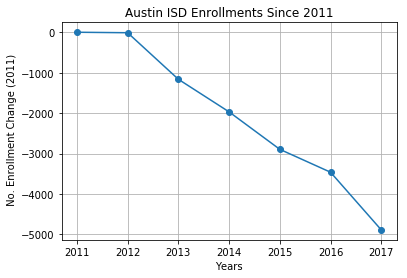

In [16]:
# plot dataframe
plt.plot(delta_enr, marker='o')

# format plot
plt.xlabel('Years')
plt.ylabel(' No. Enrollment Change (2011)')
plt.title('Austin ISD Enrollments Since 2011')
plt.grid()

# save figure
plt.savefig("Austin_ISD_Clean/Images/Austin_ISD_Enrollment_Since_2011.png")

# plot figure
plt.show()